In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Loading the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardizing features (helps with clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Converting back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Displaying first 5 rows
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


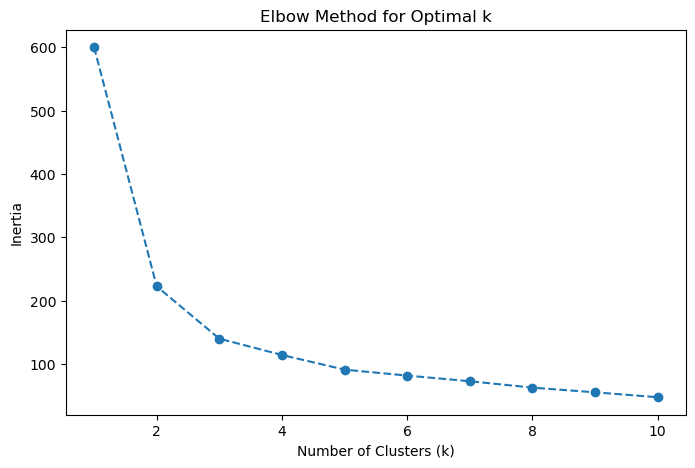

In [5]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Ploting Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

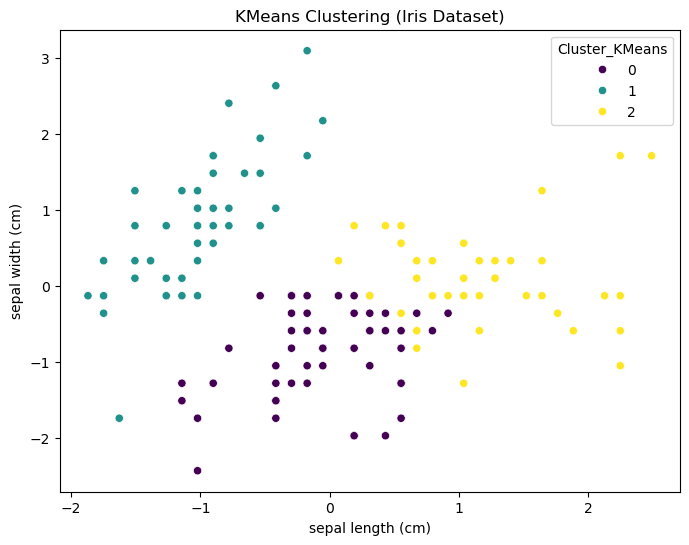

In [6]:
# Applying KMeans with optimal k (from Elbow Method, typically k=3 for Iris)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Scatter plot of clusters (using first 2 features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Cluster_KMeans'], palette='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KMeans Clustering (Iris Dataset)')
plt.show()

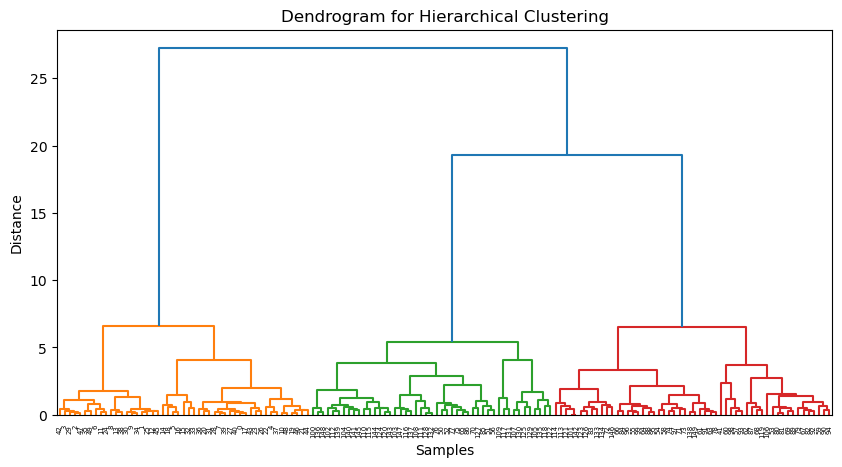

In [7]:
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

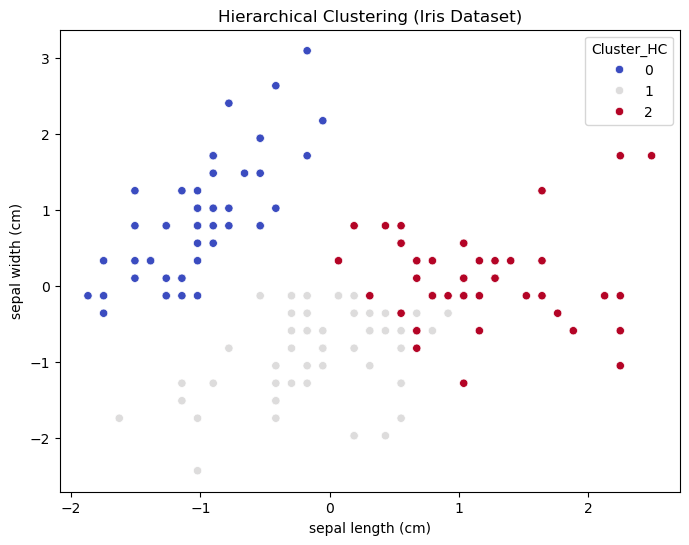

In [9]:
# Applying Agglomerative Clustering (Based on Dendrogram, typically k=3)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df_scaled['Cluster_HC'] = hc.fit_predict(df_scaled)

# Scattering plot of clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Cluster_HC'], palette='coolwarm')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering (Iris Dataset)')
plt.show()